<a href="https://colab.research.google.com/github/ramachandrasai7/New-Word-Prediction-A-simple-NLP-Task-/blob/main/Next_Word_Prediction_using_Medium_Title.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.layers import Embedding, LSTM, Dense, Bidirectional
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam

In [5]:
df=pd.read_csv("medium_data.csv")

In [6]:
len(df)

6508

In [7]:
df.head()

,id,url,title,subtitle,image,claps,responses,reading_time,publication,date
0,1,https://towardsdatascience.com/a-beginners-gui...,A Beginner’s Guide to Word Embedding with Gens...,NaN,1.png,850,8,8,Towards Data Science,2019-05-30
1,2,https://towardsdatascience.com/hands-on-graph-...,Hands-on Graph Neural Networks with PyTorch & ...,NaN,2.png,1100,11,9,Towards Data Science,2019-05-30
2,3,https://towardsdatascience.com/how-to-use-ggpl...,How to Use ggplot2 in Python,A Grammar of Graphics for Python,3.png,767,1,5,Towards Data Science,2019-05-30
3,4,https://towardsdatascience.com/databricks-how-...,Databricks: How to Save Files in CSV on Your L...,When I work on Python projects dealing…,4.jpeg,354,0,4,Towards Data Science,2019-05-30
4,5,https://towardsdatascience.com/a-step-by-step-...,A Step-by-Step Implementation of Gradient Desc...,One example of building neural…,5.jpeg,211,3,4,Towards Data Science,2019-05-30


In [8]:
df['title']

0       A Beginner’s Guide to Word Embedding with Gens...
1       Hands-on Graph Neural Networks with PyTorch & ...
2                            How to Use ggplot2 in Python
3       Databricks: How to Save Files in CSV on Your L...
4       A Step-by-Step Implementation of Gradient Desc...
                              ...                        
6503    “We” vs “I” — How Should You Talk About Yourse...
6504                     How Donald Trump Markets Himself
6505        Content and Marketing Beyond Mass Consumption
6506    5 Questions All Copywriters Should Ask Clients...
6507               How To Write a Good Business Blog Post
Name: title, Length: 6508, dtype: object

In [9]:
df['title'] = df['title'].apply(lambda x: x.replace(u'\xa0',u' '))
df['title'] = df['title'].apply(lambda x: x.replace('\u200a',' '))

In [10]:
texts=list(df['title'])
tokenizer = Tokenizer(oov_token='<oov>')
tokenizer.fit_on_texts(texts)
vocab=tokenizer.word_index

In [11]:
vocab['<oov>']
reverse_vocab={v:k for k,v in vocab.items()}

In [12]:
reverse_vocab

{1: '<oov>',
 2: 'to',
 3: 'the',
 4: 'strong',
 5: 'a',
 6: 'of',
 7: 'how',
 8: 'and',
 9: 'in',
 10: 'your',
 11: 'markup',
 12: 'for',
 13: 'you',
 14: 'with',
 15: 'is',
 16: '—',
 17: 'data',
 18: 'why',
 19: 'class',
 20: 'h3',
 21: 'i',
 22: 'what',
 23: 'on',
 24: 'learning',
 25: 'from',
 26: 'an',
 27: 'be',
 28: 'my',
 29: 'writing',
 30: 'are',
 31: 'it',
 32: 'can',
 33: 'using',
 34: 'design',
 35: 'machine',
 36: 'ux',
 37: 'about',
 38: 'do',
 39: 'not',
 40: 'python',
 41: 'ai',
 42: 'life',
 43: 'that',
 44: 'when',
 45: 'should',
 46: 'we',
 47: '5',
 48: 'science',
 49: 'make',
 50: 'time',
 51: 'need',
 52: 'as',
 53: '3',
 54: 'more',
 55: 'at',
 56: 'business',
 57: 'or',
 58: 'part',
 59: 'have',
 60: 'work',
 61: 'new',
 62: 'don’t',
 63: 'up',
 64: 'by',
 65: 'write',
 66: 'get',
 67: 'use',
 68: 'guide',
 69: 'will',
 70: 'marketing',
 71: '1',
 72: 'ways',
 73: 'deep',
 74: 'best',
 75: 'analysis',
 76: 'first',
 77: '2019',
 78: 'product',
 79: 'better',
 

In [13]:
tokenizer.texts_to_sequences([df['title'][0]])[0]

[5, 676, 68, 2, 452, 1518, 14, 2455, 3653, 99]

In [14]:
df['title'][0]

'A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model'

In [15]:
reverse_vocab[676]

'beginner’s'

In [16]:
tokenizer.sequences_to_texts(tokenizer.texts_to_sequences([df['title'][0]]))

['a beginner’s guide to word embedding with gensim word2vec model']

In [17]:
input_seq=[]
for i in df['title']:
  seq_list=tokenizer.texts_to_sequences([i])[0]
  # print(len(seq_list))
  for i in range(1,len(seq_list)):
    input_seq.append(seq_list[:i+1])

print(len(input_seq))

48461


In [18]:
max_len=max([len(x) for x in input_seq])

print("Max_len",max_len)
print("1st input seq before",input_seq[0])
input_seq=np.array(pad_sequences(input_seq,maxlen=max_len,padding='pre'))
print("1st input seq before",input_seq[0])

Max_len 40
1st input seq before [5, 676]
1st input seq before [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   5 676]


In [19]:
x=input_seq[:,:-1]

In [20]:
y=input_seq[:,-1]

In [21]:
y=tf.keras.utils.to_categorical(y,len(vocab)+1)

In [22]:
total_words=len(vocab)+1

In [40]:
# from unicodedata import bidirectional
model=Sequential()
model.add(Embedding(total_words,100,input_length=max_len-1))
model.add(Bidirectional(LSTM(150)))
model.add(Dense(total_words,activation="Softmax"))
adam=Adam(learning_rate=0.01)
model.compile(loss='categorical_crossentropy',optimizer=adam, metrics=['accuracy'])

history=model.fit(x,y,epochs=50)

model

Epoch 1/50
1515/1515 [==============================] - 42s 25ms/step - loss: 6.7368 - accuracy: 0.1306
Epoch 2/50
1515/1515 [==============================] - 20s 13ms/step - loss: 5.7773 - accuracy: 0.1759
Epoch 3/50
1515/1515 [==============================] - 20s 13ms/step - loss: 4.9854 - accuracy: 0.2027
Epoch 4/50
1515/1515 [==============================] - 19s 12ms/step - loss: 4.2426 - accuracy: 0.2453
Epoch 5/50
1515/1515 [==============================] - 20s 13ms/step - loss: 3.6951 - accuracy: 0.2978
Epoch 6/50
1515/1515 [==============================] - 18s 12ms/step - loss: 3.3510 - accuracy: 0.3339
Epoch 7/50
1515/1515 [==============================] - 20s 13ms/step - loss: 3.1188 - accuracy: 0.3589
Epoch 8/50
1515/1515 [==============================] - 21s 14ms/step - loss: 2.9255 - accuracy: 0.3843
Epoch 9/50
1515/1515 [==============================] - 19s 12ms/step - loss: 2.7880 - accuracy: 0.4043
Epoch 10/50
1515/1515 [==============================] - 18s 12m

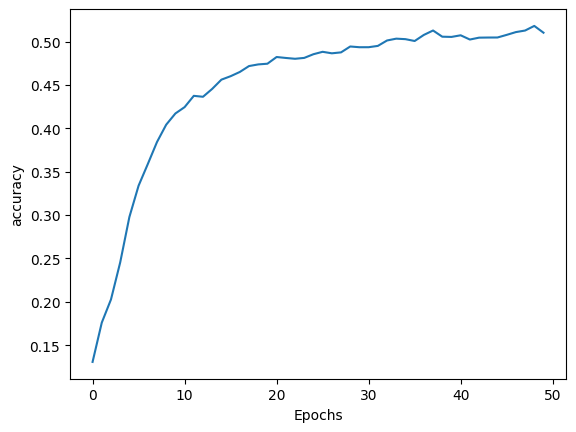

In [41]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.xlabel("Epochs")
plt.ylabel("accuracy")
plt.show()

In [42]:
test_text="A Beginner’s Guide"

predicted=""
count=0
while predicted!="<oov>" and count<max_len:
  token_list=tokenizer.texts_to_sequences([test_text])[0]
  token_list=pad_sequences([token_list],max_len-1,padding='pre')
  predicted=model.predict(token_list,verbose=0)
  predicted=np.argmax(predicted,axis=1,)
  # print(predicted[0])
  predicted=reverse_vocab[predicted[0]]
  test_text+=" "+predicted
  count=count+1


In [43]:
print(test_text)

A Beginner’s Guide to creating r to hit myself over the head of tdd or what’s it could become wikipedia with plotly gdp side projects way less themselves mls fantasy sql 201 optimizing queries regardless of cnn sentiment analysis with polynomial… intelligence without


In [44]:
df['title'][0]

'A Beginner’s Guide to Word Embedding with Gensim Word2Vec Model'